### Outline

- Introduction to statsmodel library
- Linear Regression using statsmodel
- VIF using statsmodel


### Introduction to statsmodel library

- We will be looking at another library ```statsmodel```, 
  - a more recent library for training the Linear Regression model on our CARS24 data 
  - instead of ```Scikit-learn```

#### Why even use Statsmodel in the first place when Scikit-learn does everything for us ?
- We know how important statistics and evaluation of models are.
- These helps in us understanding how good of a model is and whether we should use it in real world scenarios or not.

- The `statsmodel` library provides various statistical tests alongside model training





#### Lets see what all statsmodel provides


Statsmodel provides a few of the Linear Regression models:
- the tutorial examples for each can be found [here](https://www.statsmodels.org/dev/examples/index.html)
- We will be learning about some of them in the future lectures
- But for now we will **focus on the simple Linear Regression** model  **also called Ordindary Least Squares (OLS)**

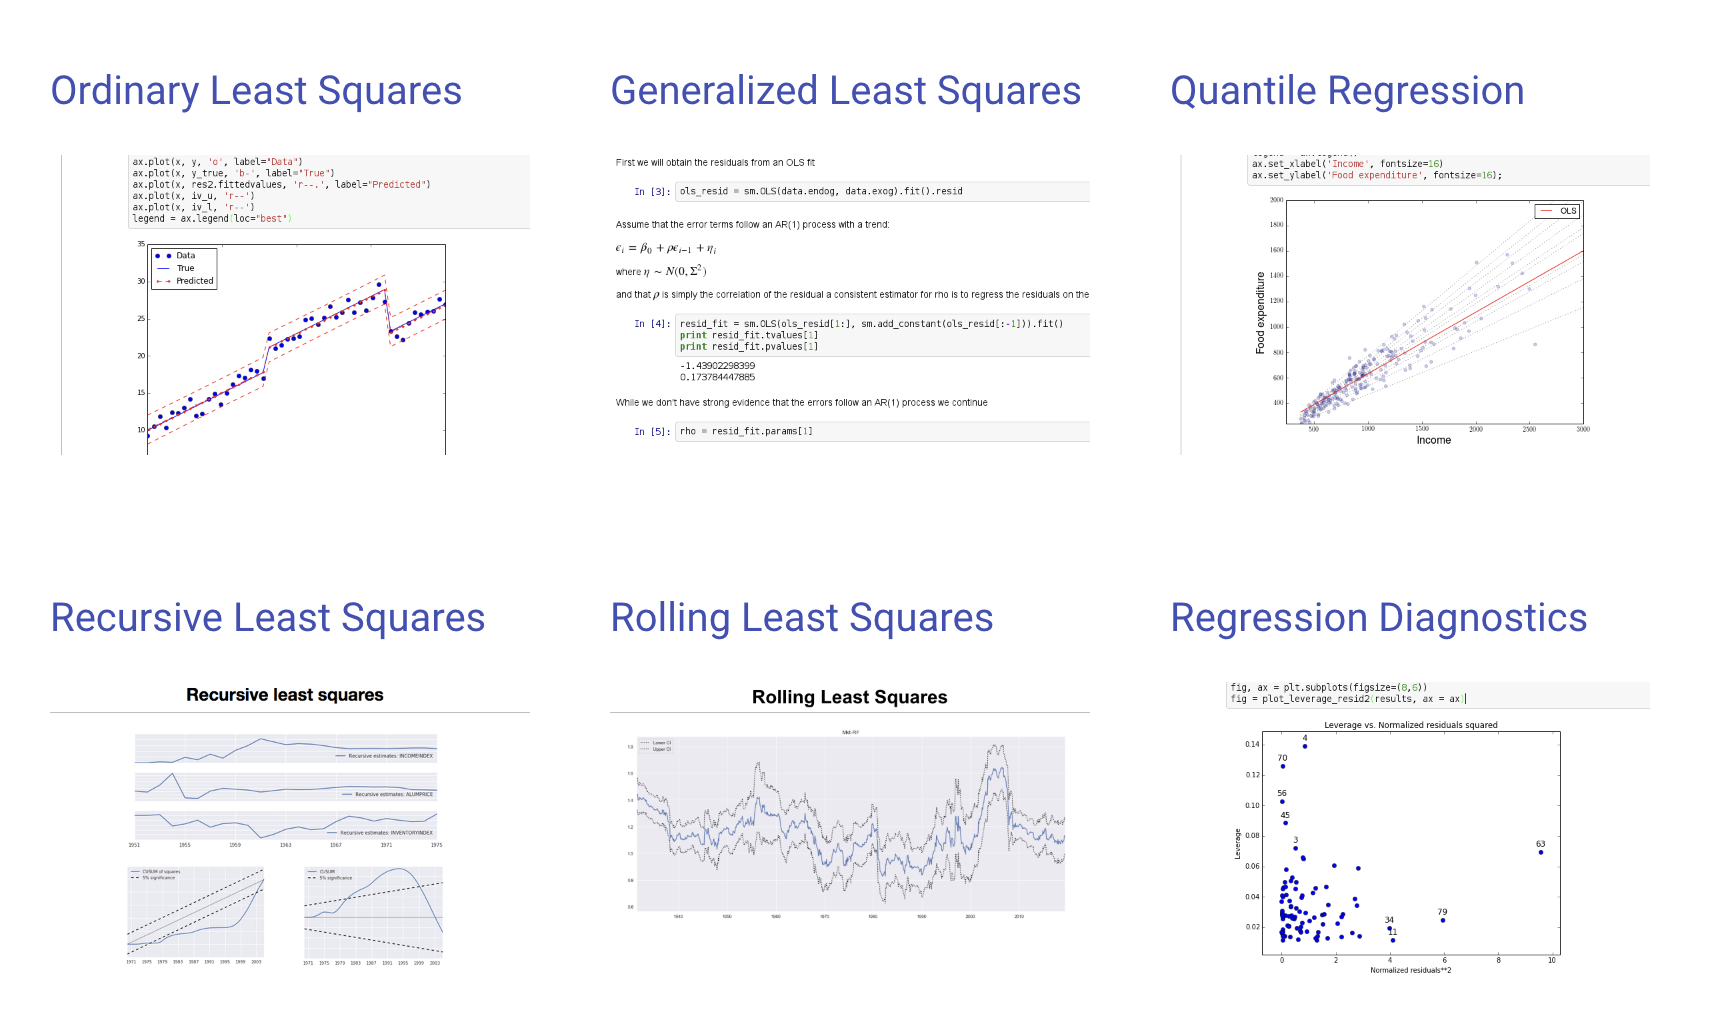

### Linear Regression using statsmodel

Loading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 21.9MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
df.shape

(19820, 18)

Defining X and Y

In [ ]:
X = df[df.columns.drop('selling_price')]
Y = df["selling_price"] 

In [ ]:
X.shape, Y.shape

((19820, 17), (19820,))

Importing statsmodel api and training Linear Regression model

In [ ]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(Y, X_sm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.017e+04
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        08:49:07   Log-Likelihood:                 125.79
No. Observations:               19820   AIC:                            -217.6
Df Residuals:                   19803   BIC:                            -83.38
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.689e-17      0.002  


Thats a biiiggg output

Lets understand each an every metric the ```summary``` function returned after LinearRegression training

Lets first look at the ones in the left first


1. **Dependent variable (Dependent Variable)**

  "selling_price” which is the dependent variable in the data we want to predict

2. **Method and Model**
  Just tells we which model we used which model tries to minimizes the sum of residual squares.

3. **Degree of Freedom (DF) Resiudals and DF models**
  - We have total 19820 observation and 17 features. 
  - DF model also called Regression df,  is the number of independent variables in our regression model minus 1. 
  - rank of the regressor matrix minus 1 if a constant is included.
  - 17-1 = 16

  - Df Residuals is calculated in the form of ‘m-n’ or ‘number of observations-number of independent variables.’ 
  - 19820-17 =  19803

4. **Covariance Type**
  - Covariance type is typically nonrobust which means there is no elimination of data to calculate the covariance between features.

  - Covariance shows how two variables move with respect to each other. 
  - If this value > 0, both move in same direction 
  - If value < 0, the variables mode in opposite direction. 


Lets heck the ones in the right column

You already know R-squared and Adjusted R-squared by now

We will understand remaining ones later.

Let's check the lower part of the summary 

- It tabulates the coefficient values and results from the statistical tests performed upon the "statistical signficance" of these coefficients in explaining the target variable. 
- We need to know confidence we may have about our estimates through the "standard errors" of our estimated coefficients

==> Null hypothesis: A coefficient equals zero. \
==> Alternate Hypothesis: A coefficient is non-zero.

To perform this test, we calculate a t-statistic by dividing the estimated coefficient by its standard error. The resulting ratio tells us how many standard-error units the coefficient is away from zero. 

- The **coef** column represents the estimated coefficients for each independent variable along with intercept value($w_0,w_1,w_2...w_n$). 
- **Std err**  are estimates of the standard deviation of the estimator
- We will talk more about Standard Error when we discuss confidence internval estimate for the coefficients

Lets move to the most important part of the summary for statistical analysis


**t-values and P>|t|**

- The t-column provides the t-statistic values corresponding to each independent variables. 
- Typically when p-value is less than 0.05, it indicates a strong evidence against null hypothesis which states that the corresponding independent variable has an effect on the dependent variable. 


It seems **every variable except LPG got less than 0.05 as p-value** indicating that the data for statistically significant.









# **VIF**
- Though we see that most of the features are statistically significant,
- There might be MultiCollinearity amongst them.



So we will perform a VIF just for a Sanity check

In [ ]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,year,inf
5,age,inf
13,Petrol,17.95
10,Diesel,17.03
16,>5,13.32
15,5,12.08
3,engine,6.27
7,model,5.80
4,max_power,5.08
6,make,3.20


**Note : Vif values tends to be infinity when there is a perfect correlation between the variables**
- Any variable with a VIF of 5 or above is considered  correlated with other variables.

- Notice how there are 6 features which have multicollinearity in them,

#### But should we only consider those features which has VIF<5 ?
- No, We should step-by-step drop the features with the highest VIF and see how the model performs for each case.
- Since dropping all of those features will cause loss of high valued information necessary for prediction 

Lets Take our case for better understanding this:
- We see feature ```year```, ```age``` has $VIF = ∞ $, and we know when selling a car both the age of the car and the year it was bought has the same meaning
- Hence dropping both of them will cause a critical information loss 
- Therefore we drop only one of the feature




Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:

In [ ]:
# build model without all those correlated columns
X_new = X.drop(columns=['year'])

Training the Linear Regression model again

In [ ]:
X2_sm = sm.add_constant(X_new)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(Y, X2_sm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.017e+04
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:47:39   Log-Likelihood:                 125.84
No. Observations:               19820   AIC:                            -217.7
Df Residuals:                   19803   BIC:                            -83.48
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.689e-17      0.002  

- Notice how performance of the model remains unchanged.

- Showing that model can use less features and still get the same results.

- Thus, reducing the feature complexity of the model.

- Now, we again perform VIF for the remaining features, and remove one of the the highly correlated feature.

- We can say, Dropping variables should be an iterative process starting with the variable having the largest VIF value because its trend is highly captured by other variables. 
  - If you do this, you will notice that VIF values for other variables would have reduced too, although to a varying extent.



**NOTE: multicollinearity may not be a problem every time.**

The need to fix multicollinearity depends primarily on the below reasons:

- When you care more about how much each individual feature rather than a group of features affects the target variable, then removing multicollinearity may be a good option

